# Create dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
from sklearn import set_config
set_config(display='diagram')

In [5]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=30
)

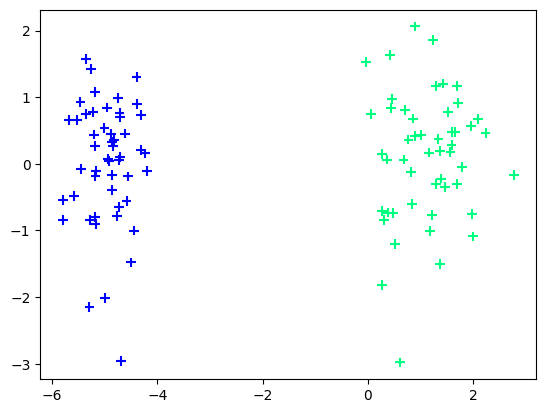

In [6]:
# draw the points how our data looks like
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', marker='+', s=50)
plt.show()

# Perceptron with step function

In [ ]:
def step_function(z):
    return 1 if z >  0 else 0


def perceptron_using_step_function(X, y):
    
    # initialization
    X = np.insert(X, 0, 1, axis=1)
    w = np.ones(X.shape[1]) # weights
    lr = 0.1 # learning rate
    
   
    for i in range(1000):
        # select a random number within no of column present in dataset
        idx = np.random.randint((X.shape[0])) 
        y_hat = step_function(np.dot(X[idx], w))
        w = w + lr*(y[idx] - y_hat) * X[idx]
        
    return w[0], w[1:]

In [8]:
intercept_,coef_ = perceptron_using_step_function(X,y)

In [9]:
intercept_

np.float64(1.2000000000000002)

In [10]:
coef_

array([1.1204053 , 0.40381514])

In [11]:
m_step = -(coef_[0]/coef_[1])
b_step = -(intercept_/coef_[1])

In [12]:
x_input_step = np.linspace(-3,3,100)
y_input_step = m_step*x_input_step + b_step

# Plot Step Function

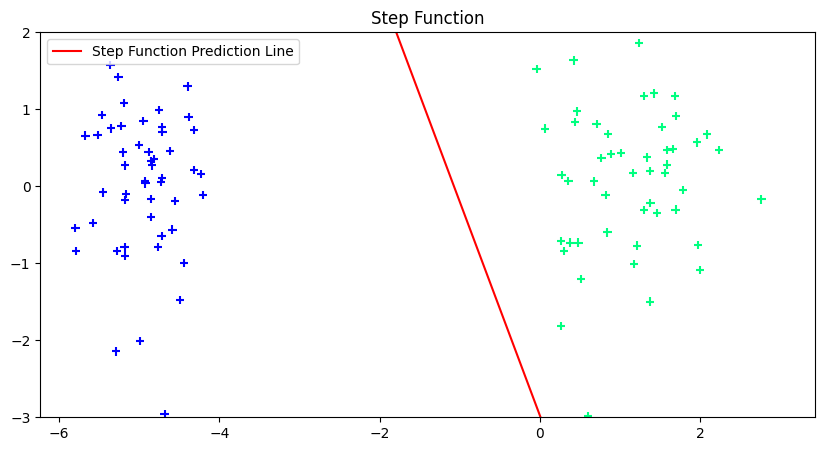

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(x_input_step, y_input_step, 'r', label='Step Function Prediction Line')
plt.scatter(X[:, 0], X[:, 1], c=y, marker='+', cmap='winter')

plt.legend(loc='best')
plt.title('Step Function')
plt.ylim(-3, 2)
plt.show()

# Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression().fit(X, y)
print(lor.coef_, lor.intercept_)

[[1.77255101 0.01190507]] [3.54700273]


In [16]:
lor.coef_[0][0]

np.float64(1.7725510128723736)

In [17]:
lor.intercept_[0]

np.float64(3.5470027286282697)

In [18]:
m_sklearn = -( lor.coef_[0][0] /  lor.coef_[0][1])
b_sklearn = -( lor.intercept_ / lor.coef_[0][1])

# create a line fro draw
x_sklearn = np.linspace(-3, 3, 100)
y_sklearn = m_sklearn*x_sklearn + b_sklearn

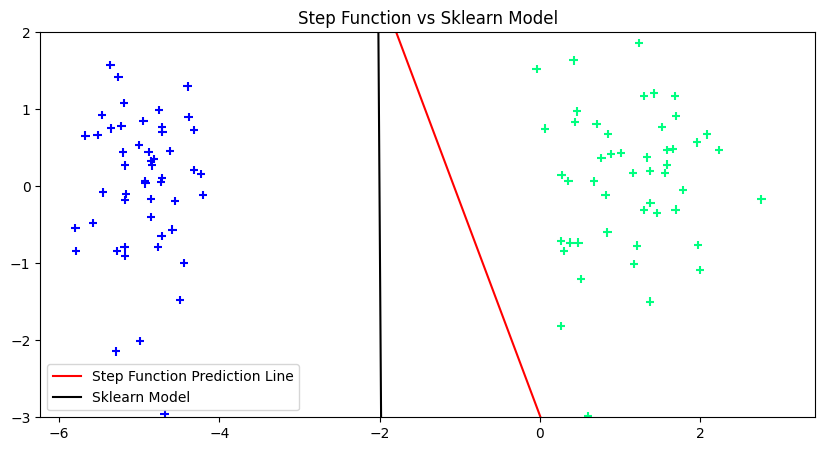

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='+', cmap='winter')
plt.plot(x_input_step, y_input_step, 'r', label='Step Function Prediction Line')
plt.plot(x_sklearn, y_sklearn, c='black', label='Sklearn Model')

plt.legend(loc='best')
plt.title('Step Function vs Sklearn Model')
plt.ylim(-3, 2)
plt.show()

# Sigmoid Function with perceptron 

In [20]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def perceptron_using_sigmoid_function(X, y):
    
    # initialization
    X = np.insert(X, 0, 1, axis=1)
    w = np.ones(X.shape[1]) # weights
    lr = 0.1 
    
   
    for i in range(1000):
        # select a random number within no of column present in dataset
        idx = np.random.randint((X.shape[0])) 
        y_hat = sigmoid_function(np.dot(X[idx], w))
        w = w + lr*(y[idx] - y_hat) * X[idx]
        
    return w[0], w[1:]

In [21]:
intercept_, coef_ = perceptron_using_sigmoid_function(X, y)

In [22]:
intercept_

np.float64(2.56901620777477)

In [23]:
coef_

array([2.29417049, 0.09310359])

In [24]:
m_sig = -(coef_[0]/coef_[1])
b_sig = -(intercept_/coef_[1])

In [25]:
x_input_sigmoid = np.linspace(-3, 3, 100)
y_input_sigmoid = m_sig*x_input_sigmoid + b_sig

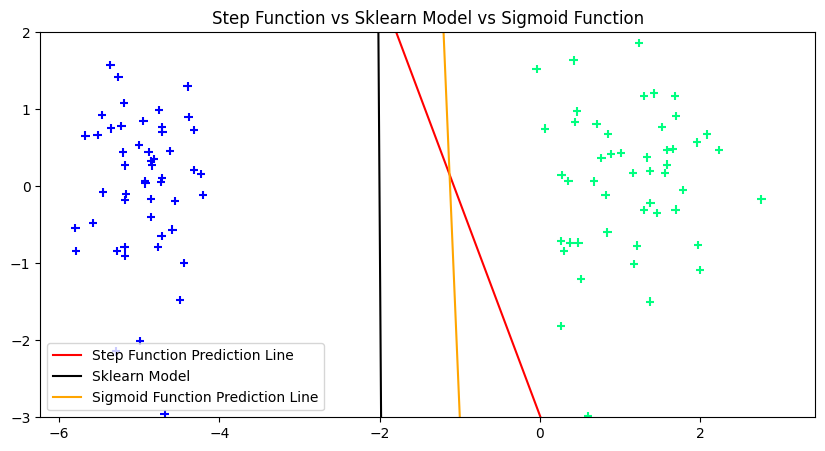

In [27]:
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=y, marker='+', cmap='winter')
plt.plot(x_input_step, y_input_step, 'r', label='Step Function Prediction Line')
plt.plot(x_sklearn, y_sklearn, c='black', label='Sklearn Model')
plt.plot(x_input_sigmoid, y_input_sigmoid, c='orange', label='Sigmoid Function Prediction Line')

plt.legend(loc='best')
plt.title('Step Function vs Sklearn Model vs Sigmoid Function')
plt.ylim(-3, 2)
plt.show()

- What happens why the sigmoid function can't helps to reach the sklean model
- Nex see what we make next model


19:58 IST 29-04-2025

---

Animation 

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)